GEOG0125 Advanced Topics in Social and Geographic Data Science (2020-2021) Coursework 1_CNN 
===============

### Landuse Prediction in London (6-class)

This research will use **Scenicness dataset** and landuse data from **OpenStreetMap** to run **Convolutional Neural Network (CNN)**. The prossibility and accuracy for machine learning models to predict landuse can be judged and provide some insights for urban planning field. 

* 0: commercial
* 1: farmland
* 2: industrial
* 3: park
* 4: residential
* 5: retail

OneDrive Link for Correponding Datasets: https://liveuclac-my.sharepoint.com/:f:/g/personal/zczlah6_ucl_ac_uk/EqqDOyzau_FMpQm8GrycI4UB_ZYB32aql3f9spKbXsY07A?e=whyybu

### 1 Load packages

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

### 2 Check datasets

### 2.1 set hyperparameters

In [2]:
# set the hyperparameters
img_width = 64
img_height = 64
batch_size = 32

### 2.2 setup the train data generator and the val data generator

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=40,
        #horizontal_flip=True,
)
validation_datagen = ImageDataGenerator(
        rescale=1. / 255
)

### 2.3 Get the train and val data from the image directory using flow_from_directory

In [4]:
train_generator = train_datagen.flow_from_directory(
        'datasets/train/',  
        # source directory for training images 
        target_size=(img_height, img_width),  
        # resize the images to the image width and height set above
        batch_size=batch_size, # Training is done 
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


validation_generator = validation_datagen.flow_from_directory(
        'datasets/test/',  # This is the source directory for testing images
        target_size=(img_height, img_width),  # All images will be resized
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 5946 images belonging to 6 classes.
Found 1481 images belonging to 6 classes.


### 2.4 Plot a sample of images from the training set with its labels

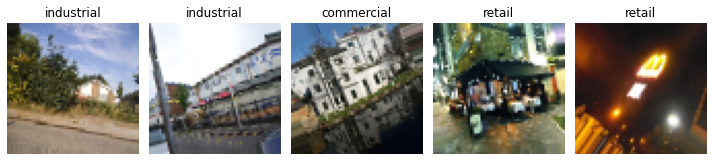

In [5]:
sample_training_images, labels = next(train_generator)
label_names = ['commercial','farmland','industrial', 
               'park', 'residential', 'retail']

def plotImages(images_arr, labels):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax, label in zip(images_arr, axes, labels):
        ax.imshow(img)
        ax.set_title(label_names[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5], labels[:5])

In [6]:
print(labels[:5])

[2. 2. 0. 5. 5.]


### 3 CNN models

### 3.1 Prepare datasets (1000 pictures per category)

In [7]:
import os
import cv2
from tqdm import tqdm

In [8]:
datadir = "datasets/crawl_dataset/"
label_names = ['commercial','farmland','industrial', 
               'park', 'residential', 'retail']

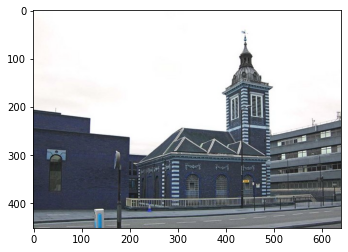

Length : 1


In [9]:
# test

image_dict = {}
for category in label_names: 
    path = os.path.join(datadir,category)  # create path to categories
    for img in os.listdir(path):  # iterate over each image per category
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        image_dict.update({img: img_array}) # for data visualization
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
print("Length : %d" % len(image_dict))

In [10]:
newarray = []
imgarray = []
location = []
for category in label_names:  
    path = os.path.join(datadir,category)  # create path to categories
    count = 0
    for img in os.listdir(path):  # iterate over each image per category
        if count <= 999:
            try:
                img_array = cv2.imread(os.path.join(path, img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (img_width, img_height))  # resize to normalize data size
               
                location.append(img)
                newarray.append(np.array(new_array).astype("float32"))
                count += 1
            except Exception as e: 
                pass
            
        # for data visualization (latitude_longitude)
        else:
            pass


In [11]:
'''
for i in imgarray:
    new = cv2.resize(i, (img_width, img_height))
    newarray.append(new)
'''

'\nfor i in imgarray:\n    new = cv2.resize(i, (img_width, img_height))\n    newarray.append(new)\n'

In [12]:
dfimg = {'image': newarray, 'location': location}
dfimg = DataFrame(dfimg)
print(dfimg)

                                                  image  \
0     [[[255.0, 254.0, 250.0], [254.0, 255.0, 253.0]...   
1     [[[37.0, 44.0, 47.0], [35.0, 41.0, 46.0], [46....   
2     [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...   
3     [[[34.0, 36.0, 37.0], [28.0, 32.0, 31.0], [53....   
4     [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...   
...                                                 ...   
5995  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...   
5996  [[[255.0, 246.0, 237.0], [255.0, 246.0, 237.0]...   
5997  [[[168.0, 70.0, 28.0], [167.0, 72.0, 29.0], [1...   
5998  [[[173.0, 207.0, 241.0], [144.0, 157.0, 193.0]...   
5999  [[[216.0, 183.0, 159.0], [253.0, 245.0, 240.0]...   

                    location  
0     51.51161_-0.098642.jpg  
1     51.50936_-0.082019.jpg  
2       51.51532_-0.0675.jpg  
3     51.51206_-0.099056.jpg  
4     51.59974_-0.195606.jpg  
...                      ...  
5995  51.52772_-0.133004.jpg  
5996   51.48875_-0.13438.jpg  
5997  51.533

In [13]:
print(len(dfimg))
dfimg.to_csv("datasets/created_datasets/dfimg.csv",index=False,sep=',')

6000


In [14]:
training_data = []
def create_training_data():
    for category in label_names: 

        path = os.path.join(datadir,category)  # create path 
        class_num = label_names.index(category)  # get the classification 
        count = 0
        for img in tqdm(os.listdir(path)):  # iterate over each image 
            if count <= 999:
                try:
                    img_array = cv2.imread(os.path.join(path, img) ,cv2.IMREAD_COLOR)  # convert to array
                    new_array = cv2.resize(img_array, (img_width, img_height))  # resize to normalize data size
                    training_data.append([new_array, class_num])  # adimage_dict.update({img_array: new_array})
                    count += 1
                except Exception as e: 
                    pass


create_training_data()

print(len(training_data))

100%|██████████| 1663/1663 [00:03<00:00, 478.07it/s]

6000


In [15]:
# check
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1], end = '')

5412204023

In [16]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [17]:
len(y)

6000

#### save to file

In [18]:
import pickle

In [19]:
pickle_out = open("datasets/pickle/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("datasets/pickle/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

#### load through pickle

In [20]:
pickle_in = open("datasets/pickle/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("datasets/pickle/y.pickle","rb")
y = pickle.load(pickle_in)

In [21]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, 
                                                      train_size=0.8,
                                                      random_state=1)

In [22]:
# summarize loaded dataset
print(f'X_train shape : {np.array(X_train).shape}')
print(f'X_test shape : {np.array(X_test).shape}')
print(f'y_train shape : {np.array(y_train).shape}')
print(f'y_test shape : {np.array(y_test).shape}')

X_train shape : (4800, 64, 64, 3)
X_test shape : (1200, 64, 64, 3)
y_train shape : (4800,)
y_test shape : (1200,)


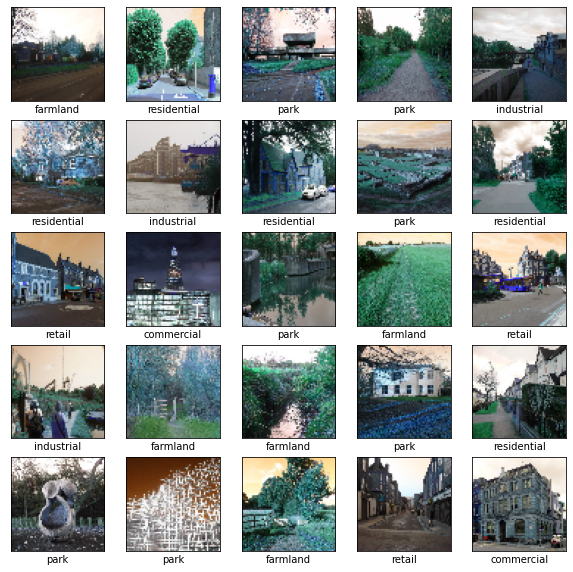

In [23]:
# plot first few images
label_names = ['commercial','farmland','industrial', 
               'park', 'residential', 'retail']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[y_train[i]])
plt.show()

In [24]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# scale the data to the range [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# convert the labels from integers to vectors
y_train=tf.keras.utils.to_categorical(y_train,6)
y_test = tf.keras.utils.to_categorical(y_test,6)

In [25]:
y_train[0]

array([0., 1., 0., 0., 0., 0.], dtype=float32)

In [26]:
X_train[0].shape

(64, 64, 3)

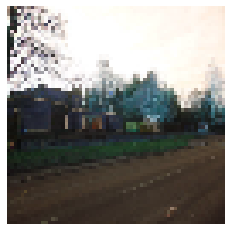

In [27]:
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

### 3.2 Image Data Generator

In [28]:
# I have commented out various augmentation techniques in the imagedatagenerator.
train_image_generator = ImageDataGenerator(#rescale=1. / 255,
                                           rotation_range=18, 
                                           zoom_range=0.15,
                                           #horizontal_flip=True, 
                                            )

val_image_generator = ImageDataGenerator(#rescale=1. / 255,
                                         rotation_range=18, 
                                         zoom_range=0.15,
                                         #horizontal_flip=True, 
                                         )

### 3.3 Optimize CNN model (layers)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/
from tensorflow.keras.callbacks import TensorBoard
import time

In [33]:
layer_sizes = [64, 128]
conv_layers = [2, 3, 4]
input_shape = (64, 64, 3)
epochs = 10
activation_fun = ['relu', 'sigmoid']
batch_sizes = [32, 64]

# TensorBoard website for checking best option of layers 
# http://localhost:6006/

for layer_size in layer_sizes:
    for conv_layer in conv_layers:
        for act in activation_fun:
            for batch_size in batch_sizes:
                NAME = "{}-conv-{}-nodes-{}-{}-batch".format(conv_layer, layer_size, act, batch_size)
                tensorboard = TensorBoard(log_dir='datasets/logs/{}'.format(NAME))
                print(NAME)

                model = Sequential()
                model.add(Conv2D(layer_size, (3, 3), input_shape=input_shape))
                model.add(Activation(act)) 
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for l in range(conv_layer-1):
                    model.add(Conv2D(layer_size, (3, 3)))
                    model.add(Activation(act))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())

                # Dense layers
                model.add(Dense(len(label_names)))
                model.add(Activation('softmax'))

                optimiser_function = SGD(lr=lr, momentum=0.9)
                model.compile(optimizer=optimiser_function, loss="categorical_crossentropy", 
                              metrics=["accuracy"])

                model.fit(train_image_generator.flow(X_train, y_train, batch_size=batch_size),
                          validation_data=val_image_generator.flow(X_test, y_test, batch_size=batch_size),
                          epochs=epochs, callbacks=[tensorboard])

2-conv-64-nodes-relu-0.01-lr-32-batch
Epoch 1/10
150/150 [==============================] - 15s 98ms/step - loss: 1.7772 - accuracy: 0.2232 - val_loss: 1.5815 - val_accuracy: 0.3292
Epoch 2/10
150/150 [==============================] - 14s 93ms/step - loss: 1.5956 - accuracy: 0.3191 - val_loss: 1.4540 - val_accuracy: 0.4017
Epoch 3/10
150/150 [==============================] - 14s 95ms/step - loss: 1.5415 - accuracy: 0.3549 - val_loss: 1.5131 - val_accuracy: 0.3433
Epoch 4/10
150/150 [==============================] - 15s 99ms/step - loss: 1.5083 - accuracy: 0.3666 - val_loss: 1.5203 - val_accuracy: 0.3633
Epoch 5/10
150/150 [==============================] - 15s 102ms/step - loss: 1.5218 - accuracy: 0.3743 - val_loss: 1.4099 - val_accuracy: 0.4158
Epoch 6/10
150/150 [==============================] - 14s 95ms/step - loss: 1.4623 - accuracy: 0.4008 - val_loss: 1.5071 - val_accuracy: 0.3442
Epoch 7/10
150/150 [==============================] - 15s 102ms/step - loss: 1.4540 - accuracy: 0

75/75 [==============================] - 15s 193ms/step - loss: 1.7917 - accuracy: 0.1747 - val_loss: 1.7559 - val_accuracy: 0.2942
Epoch 2/10
75/75 [==============================] - 14s 185ms/step - loss: 1.7151 - accuracy: 0.2858 - val_loss: 1.5690 - val_accuracy: 0.3308
Epoch 3/10
75/75 [==============================] - 14s 184ms/step - loss: 1.6281 - accuracy: 0.3155 - val_loss: 1.5270 - val_accuracy: 0.3583
Epoch 4/10
75/75 [==============================] - 14s 184ms/step - loss: 1.5753 - accuracy: 0.3440 - val_loss: 1.4657 - val_accuracy: 0.3575
Epoch 5/10
75/75 [==============================] - 14s 186ms/step - loss: 1.5170 - accuracy: 0.3586 - val_loss: 1.4700 - val_accuracy: 0.3408
Epoch 6/10
75/75 [==============================] - 14s 184ms/step - loss: 1.5019 - accuracy: 0.3723 - val_loss: 1.4655 - val_accuracy: 0.3867
Epoch 7/10
75/75 [==============================] - 14s 185ms/step - loss: 1.4744 - accuracy: 0.3878 - val_loss: 1.4438 - val_accuracy: 0.4083
Epoch 8/10

150/150 [==============================] - 16s 107ms/step - loss: 1.8443 - accuracy: 0.1693 - val_loss: 1.7963 - val_accuracy: 0.1700
Epoch 2/10
150/150 [==============================] - 16s 104ms/step - loss: 1.7945 - accuracy: 0.1760 - val_loss: 1.7925 - val_accuracy: 0.1608
Epoch 3/10
150/150 [==============================] - 16s 103ms/step - loss: 1.7936 - accuracy: 0.1640 - val_loss: 1.7923 - val_accuracy: 0.1725
Epoch 4/10
150/150 [==============================] - 16s 104ms/step - loss: 1.7924 - accuracy: 0.1749 - val_loss: 1.7940 - val_accuracy: 0.1692
Epoch 5/10
150/150 [==============================] - 16s 104ms/step - loss: 1.7937 - accuracy: 0.1586 - val_loss: 1.7929 - val_accuracy: 0.1608
Epoch 6/10
150/150 [==============================] - 16s 105ms/step - loss: 1.7923 - accuracy: 0.1648 - val_loss: 1.7916 - val_accuracy: 0.1725
Epoch 7/10
150/150 [==============================] - 16s 103ms/step - loss: 1.7942 - accuracy: 0.1586 - val_loss: 1.7948 - val_accuracy: 0.1

75/75 [==============================] - 32s 424ms/step - loss: 1.7919 - accuracy: 0.1735 - val_loss: 1.7492 - val_accuracy: 0.2550
Epoch 2/10
75/75 [==============================] - 32s 420ms/step - loss: 1.7054 - accuracy: 0.2743 - val_loss: 1.6191 - val_accuracy: 0.3183
Epoch 3/10
75/75 [==============================] - 32s 421ms/step - loss: 1.6477 - accuracy: 0.2844 - val_loss: 1.5236 - val_accuracy: 0.3250
Epoch 4/10
75/75 [==============================] - 32s 420ms/step - loss: 1.5416 - accuracy: 0.3510 - val_loss: 1.4921 - val_accuracy: 0.3425
Epoch 5/10
75/75 [==============================] - 32s 420ms/step - loss: 1.5489 - accuracy: 0.3503 - val_loss: 1.4371 - val_accuracy: 0.4217
Epoch 6/10
75/75 [==============================] - 31s 419ms/step - loss: 1.5182 - accuracy: 0.3579 - val_loss: 1.4540 - val_accuracy: 0.3983
Epoch 7/10
75/75 [==============================] - 32s 420ms/step - loss: 1.4670 - accuracy: 0.3928 - val_loss: 1.4883 - val_accuracy: 0.3942
Epoch 8/10

150/150 [==============================] - 35s 232ms/step - loss: 1.8579 - accuracy: 0.1735 - val_loss: 1.7921 - val_accuracy: 0.1725
Epoch 2/10
150/150 [==============================] - 35s 235ms/step - loss: 1.7983 - accuracy: 0.1712 - val_loss: 1.7974 - val_accuracy: 0.1550
Epoch 3/10
150/150 [==============================] - 34s 230ms/step - loss: 1.7944 - accuracy: 0.1651 - val_loss: 1.7920 - val_accuracy: 0.1692
Epoch 4/10
150/150 [==============================] - 34s 230ms/step - loss: 1.7946 - accuracy: 0.1581 - val_loss: 1.7933 - val_accuracy: 0.1725
Epoch 5/10
150/150 [==============================] - 35s 230ms/step - loss: 1.7935 - accuracy: 0.1694 - val_loss: 1.7928 - val_accuracy: 0.1608
Epoch 6/10
150/150 [==============================] - 35s 230ms/step - loss: 1.7930 - accuracy: 0.1725 - val_loss: 1.7931 - val_accuracy: 0.1608
Epoch 7/10
150/150 [==============================] - 35s 235ms/step - loss: 1.7924 - accuracy: 0.1719 - val_loss: 1.7915 - val_accuracy: 0.1

#### Comparison results (Top 3)

##### 0.01 learning rate + relu activation function
##### 3-conv-128-nodes-32-batch:
**train-accuracy**: **0.4344**; **train-loss**: **1.3993**; **validation-accuracy**: **0.4500**; **validation-loss**: **1.3658**
##### 2-conv-64-nodes-64-batch:
**train-accuracy**: 0.4415; **train-loss**: 1.3863; **validation-accuracy**: 0.4217; **validation-loss**: 1.4226
##### 3-conv-64-nodes-32-batch:
**train-accuracy**: 0.4363; **train-loss**: 1.4029; **validation-accuracy**: 0.4217; **validation-loss**: 1.4039

<img src="datasets/figure/1-1.png">

<img src="datasets/figure/1-2.png">

### 3.4 Build a simple sequential CNN model

In [34]:
def sequential_model(width, height, depth, classes):
    # initialize the model along with the input shape
    model = Sequential()
    input_shape = (height, width, depth)
    
    # Conv layer 1
    model.add(Conv2D(128, (3, 3), activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    
    # Conv layer 2 
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    # Conv layer 3 
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    
    # Flatten the 3D tensor into a 1D vector
    model.add(Flatten())
    
    # Dense layers
    model.add(Dense(classes))
    model.add(Activation('sigmoid'))
    # Display the architecture of our model
    model.summary()
    
    # Return the constructed network architecture
    return model

model = sequential_model(64, 64, 3, len(label_names))

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_186 (Conv2D)          (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_186 (MaxPoolin (None, 31, 31, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_187 (Conv2D)          (None, 29, 29, 128)       147584    
_________________________________________________________________
max_pooling2d_187 (MaxPoolin (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 12, 12, 128)     

### 3.5 Train Convolutional Neural Network with the best option

In [35]:
# Initialize the initial learning rate, batch size and number of epochs to train for
learning_rate = 0.01
batch_size = 32
epochs = 30

In [36]:
# Initialize the optimizer and compile the model. 

optimiser_function = SGD(lr=learning_rate, momentum=0.9)
model.compile(optimizer=optimiser_function, loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [37]:
# Train the network 
history = model.fit(train_image_generator.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=val_image_generator.flow(X_test, y_test, batch_size=batch_size),
                    epochs=epochs)

Epoch 1/30
150/150 [==============================] - 38s 248ms/step - loss: 1.7924 - accuracy: 0.1795 - val_loss: 1.6289 - val_accuracy: 0.2775
Epoch 2/30
150/150 [==============================] - 38s 252ms/step - loss: 1.6526 - accuracy: 0.2684 - val_loss: 1.5504 - val_accuracy: 0.3492
Epoch 3/30
150/150 [==============================] - 38s 251ms/step - loss: 1.5672 - accuracy: 0.3402 - val_loss: 1.4665 - val_accuracy: 0.3900
Epoch 4/30
150/150 [==============================] - 35s 236ms/step - loss: 1.5301 - accuracy: 0.3570 - val_loss: 1.4682 - val_accuracy: 0.3875
Epoch 5/30
150/150 [==============================] - 37s 245ms/step - loss: 1.5030 - accuracy: 0.3705 - val_loss: 1.4493 - val_accuracy: 0.4092
Epoch 6/30
150/150 [==============================] - 37s 244ms/step - loss: 1.4928 - accuracy: 0.3889 - val_loss: 1.4925 - val_accuracy: 0.3692
Epoch 7/30
150/150 [==============================] - 35s 235ms/step - loss: 1.4621 - accuracy: 0.4084 - val_loss: 1.4257 - val_ac

### 4 Evaluation

### 4.1 Plot the training loss and accuracy

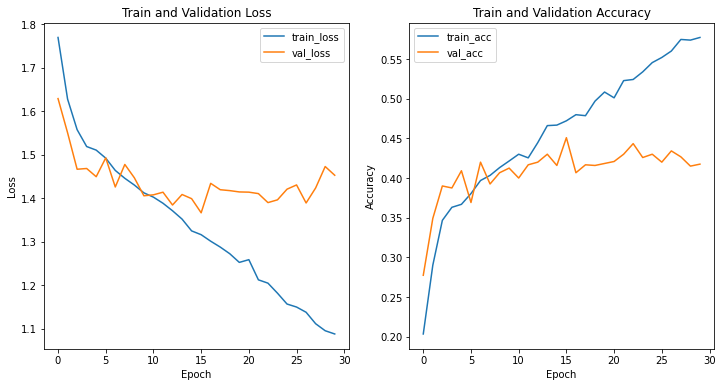

In [56]:
#plt.style.use("ggplot")
fig, ax=plt.subplots(1,2,figsize=(12,6))
ax[0].set_title("Train and Validation Loss")
ax[0].plot(history.history["loss"], label="train_loss")
ax[0].plot(history.history["val_loss"], label="val_loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].set_title("Train and Validation Accuracy")
ax[1].plot(history.history["accuracy"], label="train_acc")
ax[1].plot(history.history["val_accuracy"], label="val_acc")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
fig.savefig("datasets/figure/sequential.jpg", bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()


### 4.2 Evaluate the predictions

In [39]:
model.evaluate(X_test,y_test)

38/38 [==============================] - 2s 49ms/step - loss: 1.4480 - accuracy: 0.4300


[1.4479904174804688, 0.4300000071525574]

### 4.3 produce a confusion matrix

In [40]:
# import the libraries necessary for your confusion plot
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [58]:
# Initialize the initial learning rate, batch size and number of epochs to train for
learning_rate = 0.01
batch_size = 32
epochs = 15

# Initialize the optimizer and compile the model. 
model = sequential_model(64, 64, 3, len(label_names))
optimiser_function = SGD(lr=learning_rate, momentum=0.9)
model.compile(optimizer=optimiser_function, loss="categorical_crossentropy", 
              metrics=["accuracy"])

# Train the network 
history = model.fit(train_image_generator.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=val_image_generator.flow(X_test, y_test, batch_size=batch_size),
                    epochs=epochs)

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_189 (Conv2D)          (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_189 (MaxPoolin (None, 31, 31, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 29, 29, 128)       147584    
_________________________________________________________________
max_pooling2d_190 (MaxPoolin (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 12, 12, 128)     

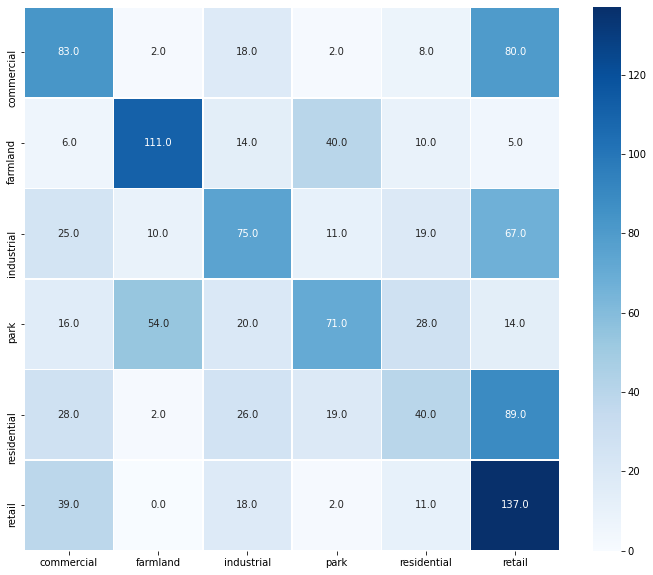

In [59]:
# make the plot
fig,ax=plt.subplots(figsize=(12,10))
y_pred = model.predict(X_test, batch_size=batch_size)
df=pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), 
                                 y_pred.argmax(axis=1)), 
                # except axis=1(max[axis=1]); others -> matrix
                index=label_names,columns=label_names)
sns.heatmap(df, annot=True,linewidths=.5, 
            cmap="Blues", fmt=".1f", ax=ax )
fig.savefig("datasets/figure/matrix.jpg", bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()

### 5 Prediction

In [42]:
def load_image(image):
    img = image.astype('float32')
    img_tensor = np.expand_dims(img, axis=0)                       
    return img_tensor

#### randomly check predictions

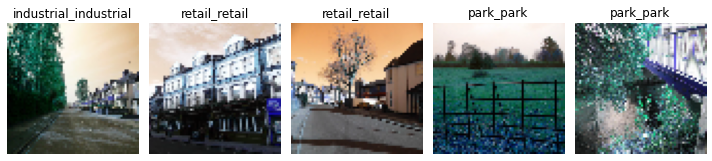

In [43]:
labels = np.array(label_names)
image_array = []
test_value = []
pred_value =[]
fig, ax = plt.subplots(1,5, figsize=(10,10))
for i in range(5):
    index = random.randint(0, X_test.shape[0])
    img = X_test[index]
    img_tensor= load_image(img)
    label = (np.where(y_test[index] == 1)[0][0])
    y_pred=model.predict(img_tensor)
    best_class = np.argmax(y_pred)
    
    image_array.append(X_test[index])
    test_value.append(labels[label])
    pred_value.append(labels[best_class])
    ax[i].imshow(img)
    ax[i].set_title(labels[label]+'_'+labels[best_class])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [44]:
labels = np.array(label_names)
image_array = []
image_array255 = []
test_value = []
pred_value =[]

for i in range(len(X_test)):
    index = i
    img = X_test[index]
    img_tensor= load_image(img)
    label = (np.where(y_test[index] == 1)[0][0])
    y_pred=model.predict(img_tensor)
    best_class = np.argmax(y_pred)
    
    image_array.append(X_test[index])
    image_array255.append(X_test[index]*255) # restore
    test_value.append(labels[label])
    pred_value.append(labels[best_class])  

In [45]:
data = {'image': image_array, 'test': test_value, 'pred': pred_value}
df_pred = DataFrame(data)
print(df_pred)

                                                  image         test  \
0     [[[0.74509805, 0.61960787, 0.5058824], [0.7686...   industrial   
1     [[[0.20392157, 0.25882354, 0.18039216], [0.235...     farmland   
2     [[[0.4, 0.24705882, 0.18431373], [0.41960785, ...   industrial   
3     [[[0.043137256, 0.050980393, 0.050980393], [0....  residential   
4     [[[0.38039216, 0.14901961, 0.16470589], [0.368...     farmland   
...                                                 ...          ...   
1195  [[[0.99607843, 0.99607843, 0.99607843], [0.996...   commercial   
1196  [[[0.99607843, 0.8392157, 0.6117647], [1.0, 0....  residential   
1197  [[[0.25490198, 0.3529412, 0.28627452], [0.2352...         park   
1198  [[[0.94509804, 0.6039216, 0.49803922], [0.9568...       retail   
1199  [[[0.8235294, 0.7254902, 0.6], [0.83137256, 0....     farmland   

             pred  
0      industrial  
1            park  
2      industrial  
3          retail  
4      commercial  
...           .

In [46]:
df_pred.to_csv("datasets/created_datasets/prediction.csv",index=False,sep=',')
print(len(df_pred))

1200


#### Prepare to concatenate with latitude & longitude dataframe

In [47]:
data = {'image': image_array255, 'test': test_value, 'pred': pred_value}
df_pred255 = DataFrame(data)
df_pred255.head()
df_pred255.to_csv("datasets/created_datasets/prediction255.csv",index=False,sep=',')
print(len(df_pred255))

1200


#### Load in the created datasets

In [60]:
df_pred255 = pd.read_csv("datasets/created_datasets/prediction255.csv")
dfimg = pd.read_csv("datasets/created_datasets/dfimg.csv")

In [61]:
df_merge = pd.merge(left=dfimg, right=df_pred255, on='image')
df_merge.head()
landuse_pred = df_merge[['location','test','pred']]
landuse_pred.head()

,location,test,pred
0,51.50332_-0.092359.jpg,commercial,industrial
1,51.50916_-0.086351.jpg,commercial,retail
2,51.54909_-0.171216.jpg,commercial,retail
3,51.50668_-0.088904.jpg,commercial,industrial
4,51.51421_-0.081815.jpg,commercial,commercial


In [62]:
coordinates = landuse_pred['location'].str.split('_', expand=True)
coordinates.columns = ['latitude','mix'] # (latitude_longitude)
plot_data = pd.concat([landuse_pred,coordinates],axis=1)
plot_data.head()

,location,test,pred,latitude,mix
0,51.50332_-0.092359.jpg,commercial,industrial,51.50332,-0.092359.jpg
1,51.50916_-0.086351.jpg,commercial,retail,51.50916,-0.086351.jpg
2,51.54909_-0.171216.jpg,commercial,retail,51.54909,-0.171216.jpg
3,51.50668_-0.088904.jpg,commercial,industrial,51.50668,-0.088904.jpg
4,51.51421_-0.081815.jpg,commercial,commercial,51.51421,-0.081815.jpg


In [63]:
longitude = plot_data['mix'].str.split('.jpg', expand=True)
longitude.columns = ['longitude','jpg']
longitude = longitude[['longitude']]
plot_data = pd.concat([plot_data,longitude],axis=1)
plot_data.head()

,location,test,pred,latitude,mix,longitude
0,51.50332_-0.092359.jpg,commercial,industrial,51.50332,-0.092359.jpg,-0.092359
1,51.50916_-0.086351.jpg,commercial,retail,51.50916,-0.086351.jpg,-0.086351
2,51.54909_-0.171216.jpg,commercial,retail,51.54909,-0.171216.jpg,-0.171216
3,51.50668_-0.088904.jpg,commercial,industrial,51.50668,-0.088904.jpg,-0.088904
4,51.51421_-0.081815.jpg,commercial,commercial,51.51421,-0.081815.jpg,-0.081815


In [64]:
import geopandas as gpd
import contextily as ctx
gdf = gpd.GeoDataFrame(plot_data, geometry=gpd.points_from_xy(plot_data.longitude, 
                                                              plot_data.latitude))
gdf.head()

,location,test,pred,latitude,mix,longitude,geometry
0,51.50332_-0.092359.jpg,commercial,industrial,51.50332,-0.092359.jpg,-0.092359,POINT (-0.09236 51.50332)
1,51.50916_-0.086351.jpg,commercial,retail,51.50916,-0.086351.jpg,-0.086351,POINT (-0.08635 51.50916)
2,51.54909_-0.171216.jpg,commercial,retail,51.54909,-0.171216.jpg,-0.171216,POINT (-0.17122 51.54909)
3,51.50668_-0.088904.jpg,commercial,industrial,51.50668,-0.088904.jpg,-0.088904,POINT (-0.08890 51.50668)
4,51.51421_-0.081815.jpg,commercial,commercial,51.51421,-0.081815.jpg,-0.081815,POINT (-0.08181 51.51421)


In [65]:
gdf1 = gdf.dissolve(by='test', aggfunc='sum')
gdf1 = gdf1[['geometry']]
gdf1

,geometry
test,
commercial,"MULTIPOINT (-0.45110 51.48298, -0.44549 51.508..."
farmland,"MULTIPOINT (-0.49113 51.60094, -0.48546 51.584..."
industrial,"MULTIPOINT (-0.48826 51.54398, -0.48820 51.545..."
park,"MULTIPOINT (-0.48356 51.57701, -0.47925 51.567..."
residential,"MULTIPOINT (-0.44520 51.60582, -0.42152 51.497..."
retail,"MULTIPOINT (-0.47896 51.54602, -0.47896 51.546..."


/opt/anaconda3/envs/envGEOG0125/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


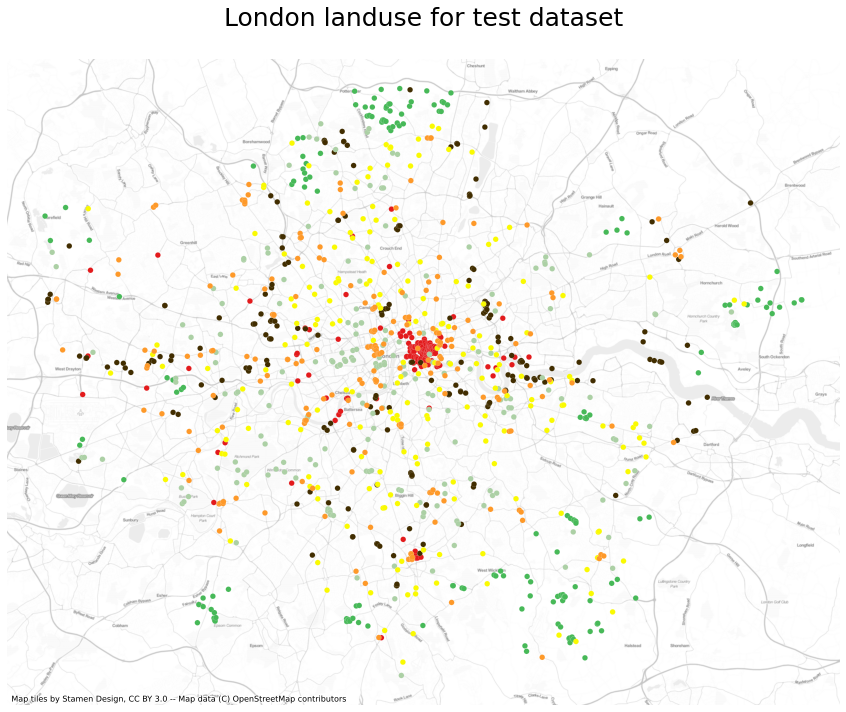

In [67]:
gdf1 =gdf1.set_crs(epsg=4326)
gdf1= gdf1.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
landuseplot=gdf1.plot(figsize=(8, 8), alpha=1, linewidth=0.1,
                      edgecolor='white',ax=ax,legend=True,
                      column='test',markersize=30,
                      color=['#e31a1c','#47b958','#412d00',
                             '#acd0a5','#fafa01','#fe9929'])
# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.5)

# set the title
ax.set_title("London landuse for test dataset\n",fontsize= 25)
# remove the axis
ax.set_axis_off()
# tighten the layout
fig.tight_layout()

fig.savefig("datasets/figure/London landuse for test dataset.jpg", bbox_inches='tight', pad_inches=0.5, dpi=300)

/opt/anaconda3/envs/envGEOG0125/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


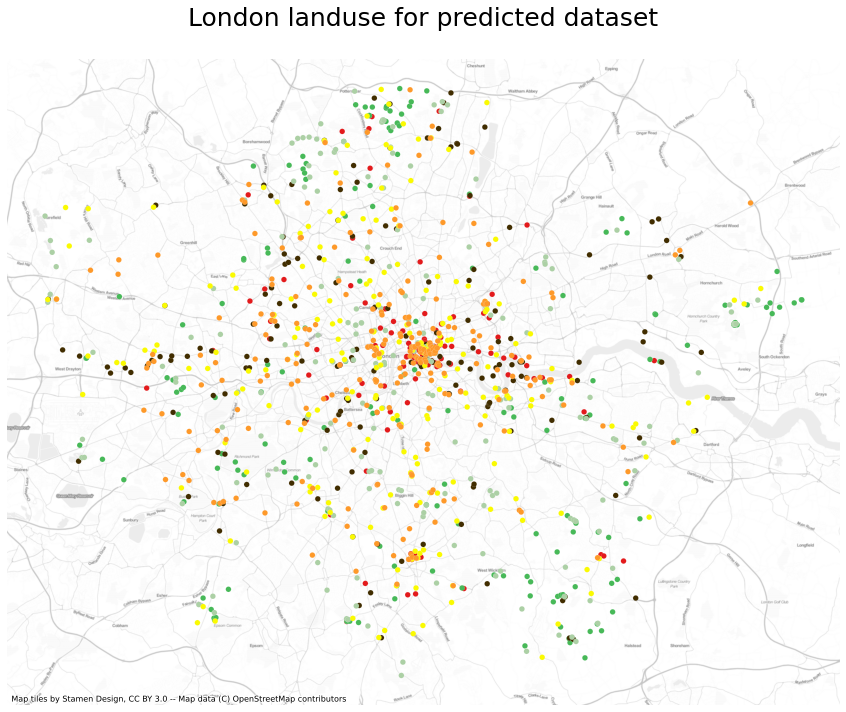

In [68]:
gdf2 = gdf.dissolve(by='pred', aggfunc='sum')
gdf2 =gdf2.set_crs(epsg=4326)
gdf2 = gdf2.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
landuseplot=gdf2.plot(figsize=(8, 8), alpha=1, linewidth=0.1,
                      edgecolor='white',ax=ax,legend=True,
                      column='test', markersize=30,
                      color=['#e31a1c','#47b958','#412d00',
                             '#acd0a5','#fafa01','#fe9929'])
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.5)

# set the title
ax.set_title("London landuse for predicted dataset\n",fontsize= 25)
# remove the axis
ax.set_axis_off()
# tighten the layout
fig.tight_layout()

fig.savefig("datasets/figure/London landuse for predicted dataset.jpg", bbox_inches='tight', pad_inches=0.5, dpi=300)